Training set: (17000, 28, 28, 1), Labels: (17000, 10)
Testing set: (3000, 28, 28, 1), Labels: (3000, 10)


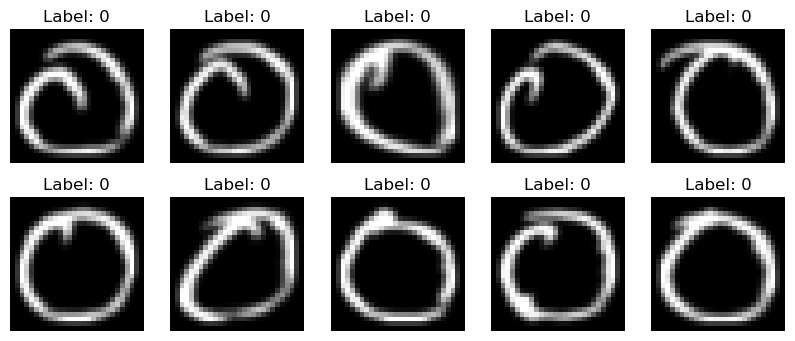

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
from PIL import Image

# Define dataset paths (Update this path to match your system)
train_dir = r"C:\Users\Amit Khatri\ 6CS012 AI ML\directory to extract\DevanagariHandwrittenDigitDataset\Train"
test_dir = r"C:\Users\Amit Khatri\ 6CS012 AI ML\directory to extract\DevanagariHandwrittenDigitDataset\Test"

# Ensure dataset directories exist
if not os.path.exists(train_dir) or not os.path.exists(test_dir):
    raise FileNotFoundError("Dataset folders not found. Please check the file paths!")

# Define image size
img_height, img_width = 28, 28
# Function to load images and labels using PIL
def load_images_from_folder(folder):
  images = []
  labels = []
  class_names = sorted(os.listdir(folder)) # Sorted class names (digit_0, digit_1, ...)
  class_map = {name: i for i, name in enumerate(class_names)} # Map class names to labels
  for class_name in class_names:
    class_path = os.path.join(folder, class_name)
    label = class_map[class_name]
    for filename in os.listdir(class_path):
      img_path = os.path.join(class_path, filename)
  # Load image using PIL
      img = Image.open(img_path).convert("L") # Convert to grayscale
      img = img.resize((img_width, img_height)) # Resize to (28,28)
      img = np.array(img) / 255.0 # Normalize pixel values to [0,1]
      images.append(img)
      labels.append(label)
  return np.array(images), np.array(labels)
# Load training and testing datasets
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)
# Reshape images for Keras input
x_train = x_train.reshape(-1, img_height, img_width, 1) # Shape (num_samples, 28, 28, 1)
x_test = x_test.reshape(-1, img_height, img_width, 1)
# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
# Print dataset shape
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")
# Visualize some images
plt.figure(figsize=(10, 4))
for i in range(10):
  plt.subplot(2, 5, i + 1)
  plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
  plt.title(f"Label: {np.argmax(y_train[i])}")
  plt.axis("off")
plt.show()
# Apply Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
datagen.fit(x_train)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

def build_model():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))  # Flatten the image to 1D vector
    model.add(Dense(64, activation='sigmoid'))  # 1st hidden layer
    model.add(Dense(128, activation='sigmoid'))  # 2nd hidden layer
    model.add(Dense(256, activation='sigmoid'))  # 3rd hidden layer
    model.add(Dense(10, activation='softmax'))  # Output layer with 10 classes (Devnagari digits)

    return model

# Build the model
model = build_model()
model.summary()  # To see the architecture


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)



In [ ]:
# Define callbacks for early stopping and best model saving
callbacks = [
    ModelCheckpoint(filepath="best_model.keras", save_best_only=True, monitor="val_loss"),
    EarlyStopping(monitor="val_loss", patience=4, restore_best_weights=True)
]

# Train the model with augmented data
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=128),
    epochs=500,
    validation_data=(x_test, y_test),
    callbacks=callbacks
)

Epoch 1/500
133/133 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.2420 - loss: 2.1566 - val_accuracy: 0.6767 - val_loss: 1.0242
Epoch 2/500
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.6468 - loss: 1.0652 - val_accuracy: 0.8243 - val_loss: 0.5725
Epoch 3/500
133/133 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.7503 - loss: 0.7499 - val_accuracy: 0.8900 - val_loss: 0.3873
Epoch 4/500
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.8086 - loss: 0.5835 - val_accuracy: 0.9163 - val_loss: 0.3040
Epoch 5/500
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.8486 - loss: 0.4812 - val_accuracy: 0.9363 - val_loss: 0.2441
Epoch 6/500
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.8688 - loss: 0.4030 - val_accuracy: 0.9490 - val_loss: 0.2020
Epoch 7/500
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.8944 - loss: 0.3363 - val_accuracy: 0.9560 - val_loss: 0.1674
Epoch 8/500
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.9055 - loss: 0.3013 - 

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")  # Should be between 90-95%

# Save the trained model in the recommended format
model.save("devnagari_digit_classifier.keras")

# Load the saved model
loaded_model = tf.keras.models.load_model("devnagari_digit_classifier.keras")

94/94 - 0s - 2ms/step - accuracy: 0.9870 - loss: 0.0520
Test accuracy: 0.9870


In [ ]:
# Make predictions
predictions = loaded_model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# Check the first prediction
print(f"Predicted label for first image: {predicted_labels[0]}")
print(f"True label for first image: {np.argmax(y_test[0])}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Predicted label for first image: 0
True label for first image: 0


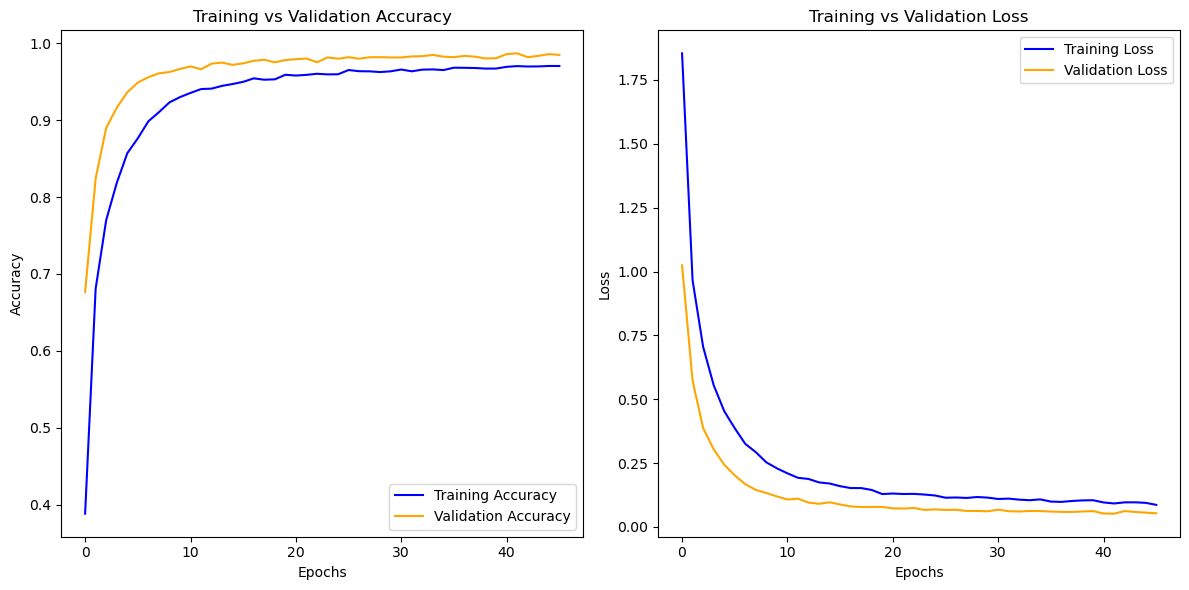

In [ ]:
# Plot Training & Validation Accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Training Accuracy", color="blue")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy", color="orange")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Training Loss", color="blue")
plt.plot(history.history["val_loss"], label="Validation Loss", color="orange")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()

plt.tight_layout()
plt.show()